# Backpack Price Prediction
This notebook takes part of the competion Backpack Prediction Callenge to predict the price of backpacks.

Goal: Predict the price of backpacks given various attributes.

Submission File
For each id in the test set, you must predict the Price of the backpack. The file should contain a header and have the following format:

id,Price
300000,81.411
300001,81.411
300002,81.411
etc.

Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Student Bag Price Prediction Dataset dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
train.csv - the training dataset; Price is the target
train_extra.csv - a whole lot more training data!
test.csv - the test dataset; your objective is to predict the Price for each row
sample_submission.csv - a sample submission file in the correct format.

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
# train_extra_df = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')

# Display the first few rows of the training data
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


## Exploratory Data Analysis

In [10]:
# Summary statistics
train_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [11]:
# Check for missing values
train_df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

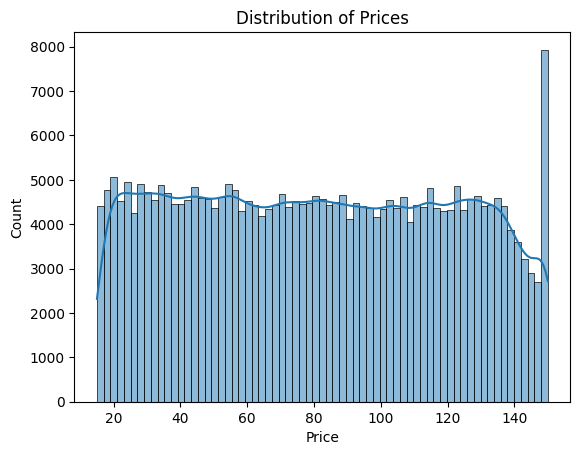

In [12]:
# Visualize the distribution of the target variable
sns.histplot(train_df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

## Data Preprocessing

In [13]:
# Fill missing values
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.drop('Price')
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())
test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].mean())

# Encode categorical variables
X = pd.get_dummies(train_df.drop(columns=['Price'], errors='ignore'))
test_df_encoded = pd.get_dummies(test_df)

# Align the columns of the test set with the training set
X, test_df_encoded = X.align(test_df_encoded, join='left', axis=1, fill_value=0)

# Separate target variable
y = train_df['Price'] if 'Price' in train_df.columns else pd.Series([])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df_encoded)

## Model Training

In [14]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1563.9152793823077


## Prediction


In [16]:
# Predict on the test set
test_predictions = model.predict(test_scaled)

# Prepare the submission file
submission = pd.DataFrame({'id': test_df['id'].astype(str), 'Price': test_predictions})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,Price
0,300000,85.777048
1,300001,85.824342
2,300002,95.237303
3,300003,84.668192
4,300004,75.832378
